In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sonar.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
# PCA

from sklearn.decomposition import PCA

x = df.iloc[:,0:-1] #excluding the last target column
pca = PCA(n_components=10)
x=pca.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277


In [4]:
y = df.iloc[:,-1]
y = pd.DataFrame(y)
y.head()

,60
0,R
1,R
2,R
3,R
4,R


In [5]:
df = pd.concat([x,y],axis=1)
df.rename(columns={60:10},inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054,R
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529,R
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559,R
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795,R
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277,R


In [6]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02
mean,3.469447e-17,7.579407e-17,2.661299e-17,1.004138e-17,6.922214e-18,-5.767956e-17,-5.647859e-17,-4.838878e-17,4.003208e-19,2.468645e-17
std,7.475641e-01,5.969033e-01,3.867231e-01,3.360182e-01,3.004478e-01,2.789444e-01,2.712011e-01,2.145191e-01,1.974355e-01,1.832843e-01
min,-1.402893e+00,-1.153807e+00,-9.366999e-01,-6.993244e-01,-7.247852e-01,-5.946661e-01,-7.558017e-01,-6.388454e-01,-5.863399e-01,-5.282906e-01
25%,-5.772305e-01,-4.528582e-01,-2.352344e-01,-2.266887e-01,-2.035958e-01,-1.799179e-01,-1.737484e-01,-1.338452e-01,-9.849582e-02,-9.947509e-02
50%,4.291975e-02,-5.543604e-02,-1.372230e-02,-2.093911e-02,8.825685e-03,-4.818261e-03,-1.684433e-02,5.946539e-03,1.465362e-02,3.834599e-03
75%,4.939137e-01,3.971998e-01,2.137333e-01,2.053990e-01,1.888693e-01,1.650326e-01,1.241432e-01,1.180029e-01,1.122550e-01,1.085331e-01
max,1.704801e+00,1.481776e+00,1.095637e+00,9.248534e-01,7.757588e-01,8.109163e-01,9.101572e-01,6.459381e-01,5.873816e-01,5.894520e-01


In [8]:
df.shape

(208, 11)

In [9]:
# Checking for missing values

df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

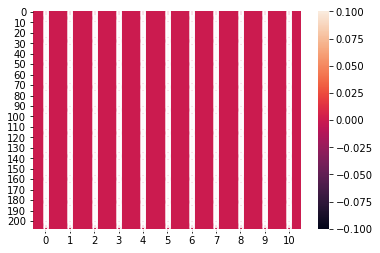

In [10]:
# Using heatmap 

import seaborn as sns
sns.heatmap(df.isnull(),annot=True)

In [11]:
# Converting categorical to numerical data in target column

t = pd.get_dummies(df[10],drop_first=True)
t

,R
0,1
1,1
2,1
3,1
4,1
...,...
203,0
204,0
205,0
206,0


In [12]:
df = pd.concat([df,t],axis =1)
df.drop(10,axis=1,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,R
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054,1
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529,1
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559,1
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795,1
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277,1


In [13]:
# Correlation

df.corr()

,0,1,2,3,4,5,6,7,8,9,R
0,1.000000e+00,-7.700012e-17,-1.026911e-16,-7.708231e-17,6.884435e-17,-1.436210e-17,6.357354e-17,-7.363028e-17,7.798568e-17,9.480208e-18,0.156212
1,-7.700012e-17,1.000000e+00,1.263383e-16,-3.979354e-16,1.824302e-16,-1.510946e-16,-9.722100e-17,-9.345835e-17,2.019524e-16,-2.573771e-17,0.042275
2,-1.026911e-16,1.263383e-16,1.000000e+00,5.571291e-16,9.588228e-17,7.595980e-17,-1.416048e-17,7.748150e-17,1.567201e-16,-2.011419e-17,-0.005134
3,-7.708231e-17,-3.979354e-16,5.571291e-16,1.000000e+00,-3.797066e-16,-8.198772e-17,4.541745e-17,1.039148e-16,-1.122984e-16,6.300178e-17,-0.438379
4,6.884435e-17,1.824302e-16,9.588228e-17,-3.797066e-16,1.000000e+00,-1.583340e-16,-1.737439e-16,8.702697e-17,1.889555e-16,9.108142e-17,0.336482
5,-1.436210e-17,-1.510946e-16,7.595980e-17,-8.198772e-17,-1.583340e-16,1.000000e+00,-6.101752e-16,-6.344164e-17,1.608012e-16,-1.377700e-16,0.061745
6,6.357354e-17,-9.722100e-17,-1.416048e-17,4.541745e-17,-1.737439e-16,-6.101752e-16,1.000000e+00,-1.743952e-16,-9.719295e-17,6.743776e-19,-0.130570
7,-7.363028e-17,-9.345835e-17,7.748150e-17,1.039148e-16,8.702697e-17,-6.344164e-17,-1.743952e-16,1.000000e+00,-7.903711e-16,1.404604e-16,-0.034167
8,7.798568e-17,2.019524e-16,1.567201e-16,-1.122984e-16,1.889555e-16,1.608012e-16,-9.719295e-17,-7.903711e-16,1.000000e+00,-6.947532e-17,0.055580
9,9.480208e-18,-2.573771e-17,-2.011419e-17,6.300178e-17,9.108142e-17,-1.377700e-16,6.743776e-19,1.404604e-16,-6.947532e-17,1.000000e+00,-0.019284


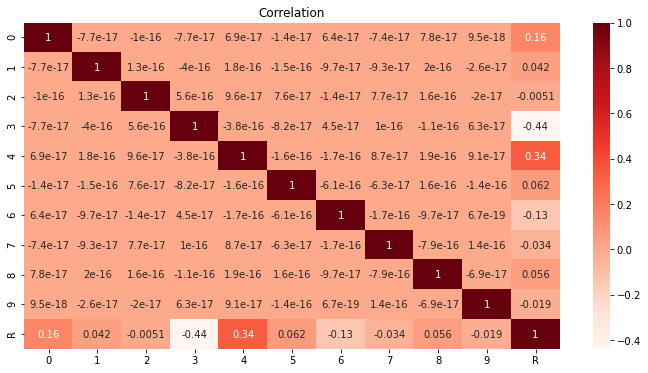

In [14]:
# Visualizing correlation using heatmap

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Reds')

In [15]:
# We see that the target is +vely correlated to 4 and -vely correlated to 3

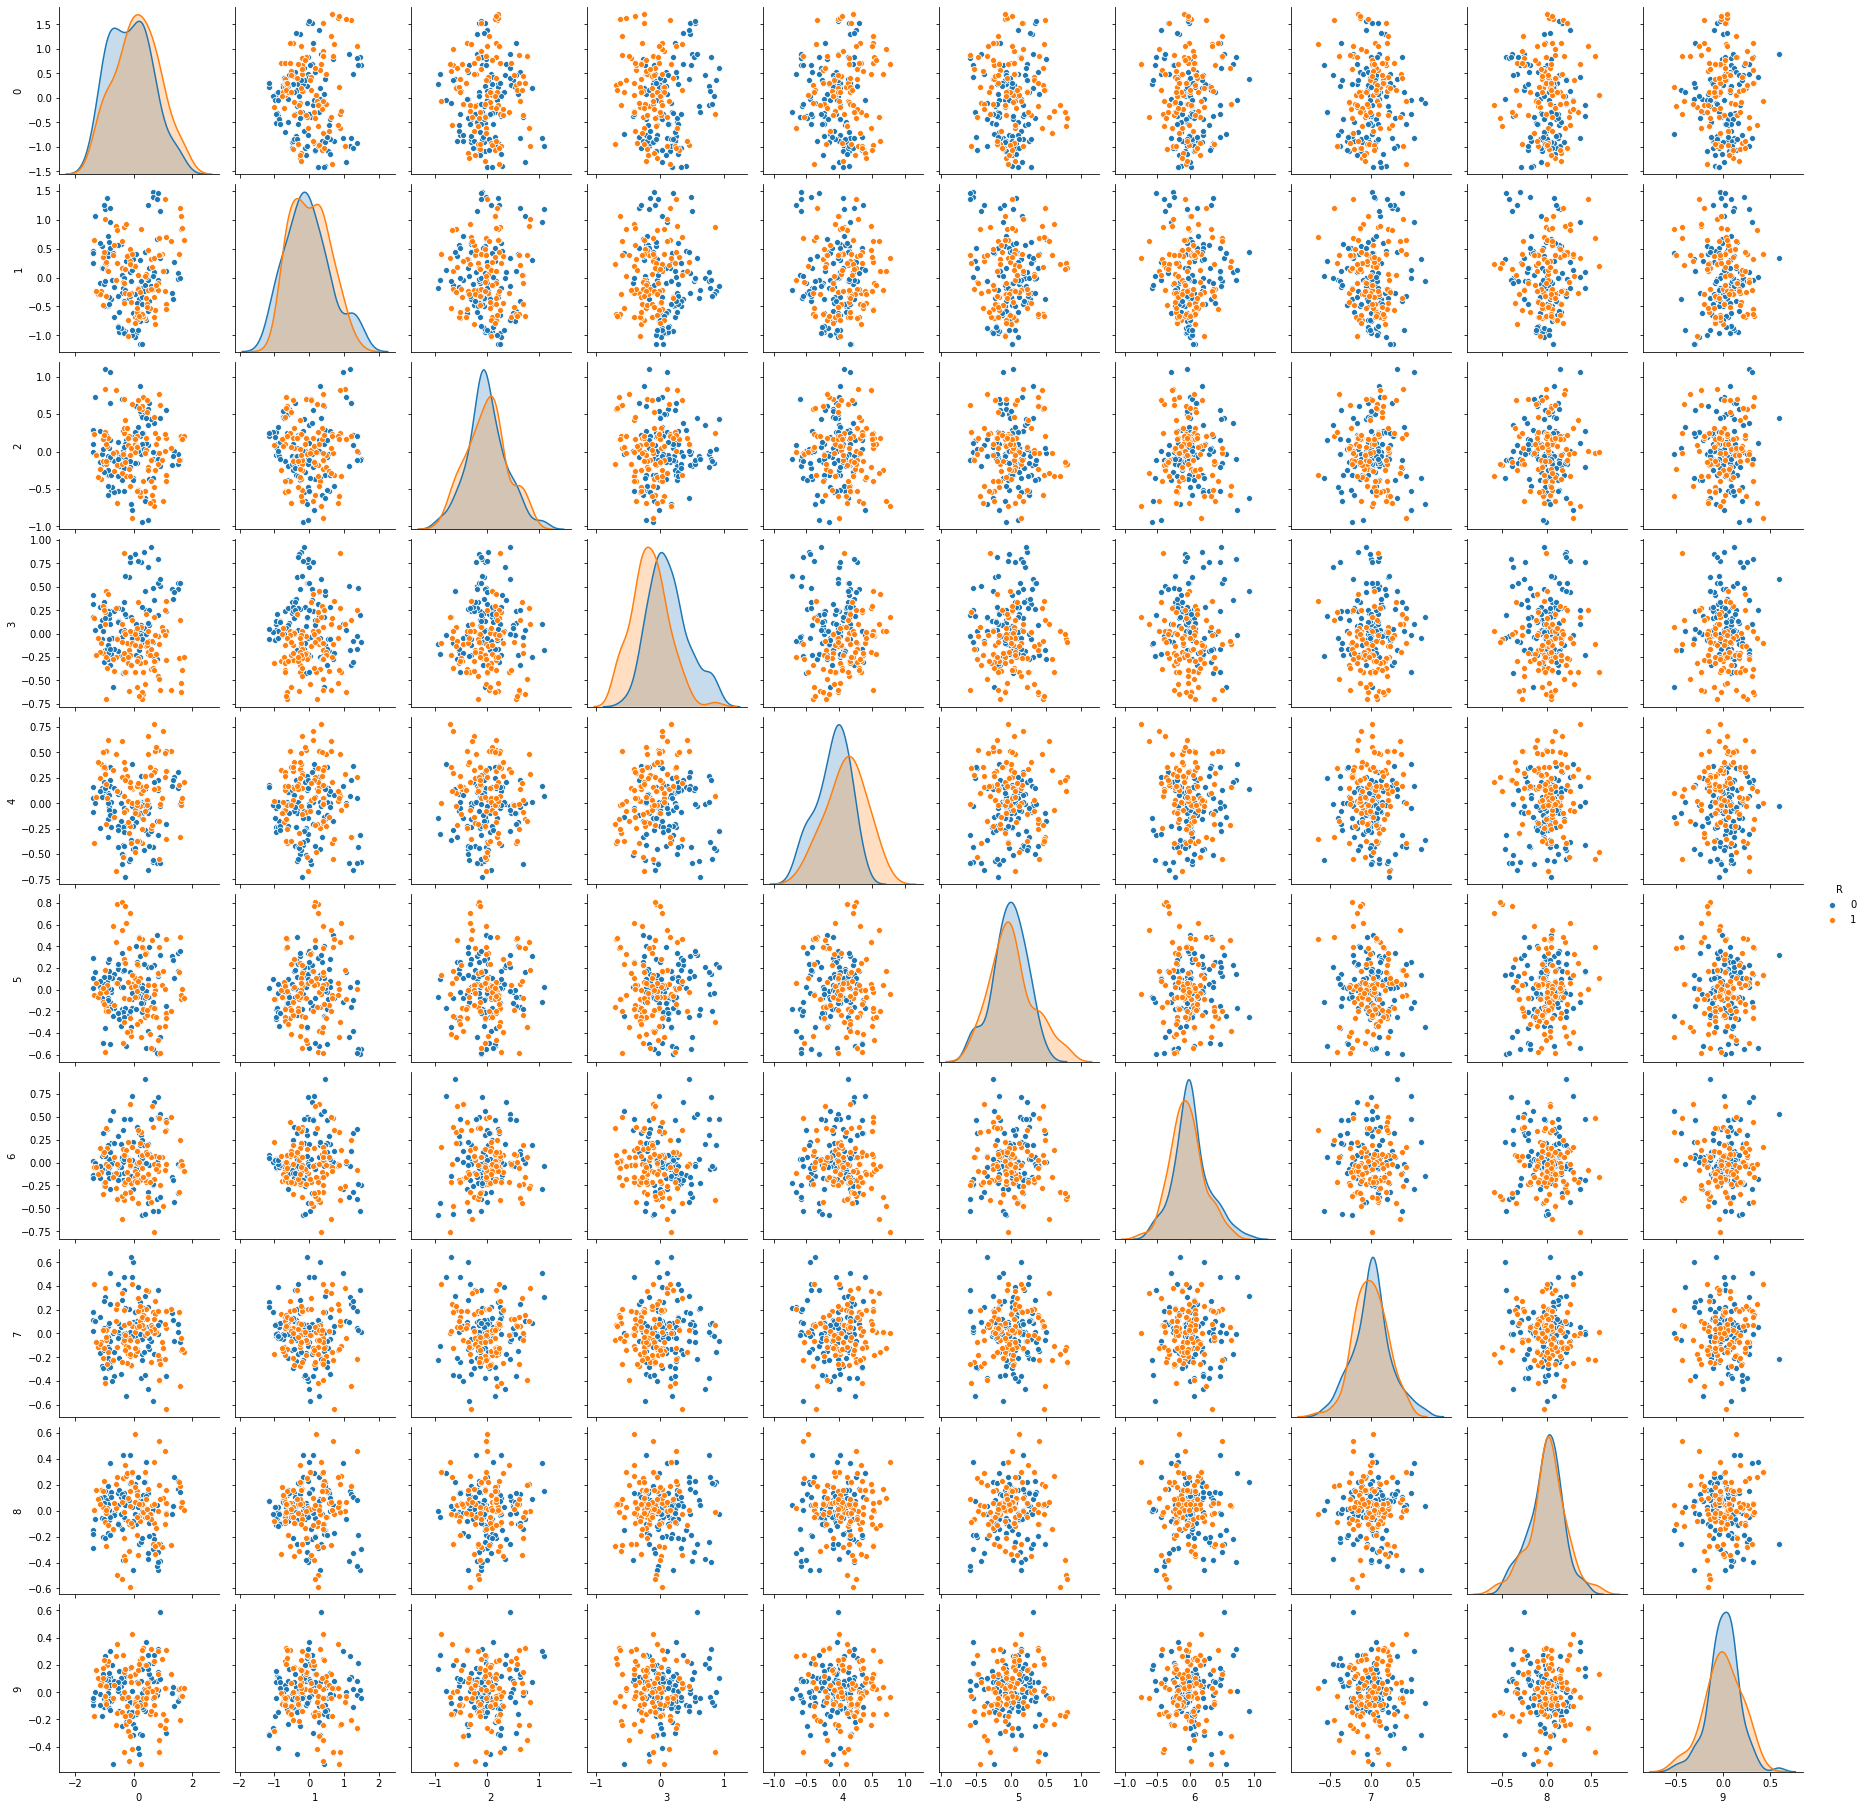

In [16]:
sns.pairplot(df,hue ='R')
# We observe a lot of overlapping btween the two categories of R

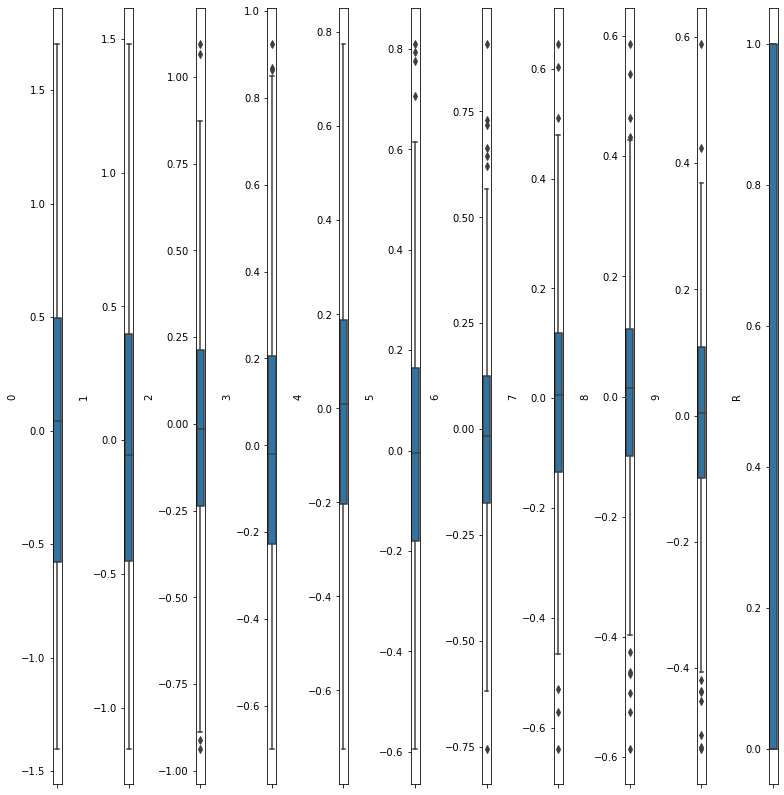

In [17]:
# Checking for outliers using boxplot

collist = df.columns.values
ncol = 11
nrows = 5

plt.figure(figsize=(ncol,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()
    

In [18]:
# Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,0,1,2,3,4,5,6,7,8,9,R
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054,1
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529,1
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559,1
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795,1
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277,1


In [19]:
df.shape

(208, 11)

In [20]:
df_new.shape # Outliers removed

(205, 11)

In [21]:
df = df_new

In [22]:
# Skewness

df.skew() # All columns have managable skewness

0    0.192347
1    0.418013
2    0.198325
3    0.465196
4   -0.085946
5    0.256839
6    0.281034
7   -0.040029
8   -0.222618
9   -0.429555
R    0.108266
dtype: float64

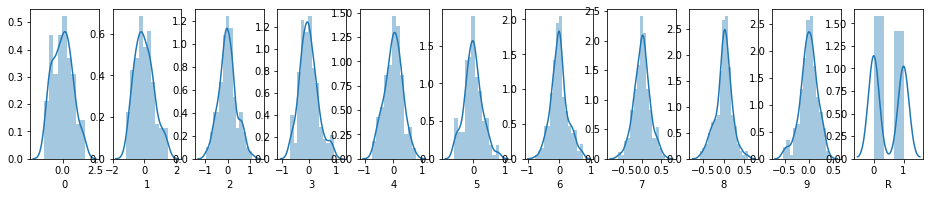

In [23]:
# Visualizing skewness

collist = df.columns.values
ncol = 11
nrow= 5

plt.figure(figsize = (16,16))
plt.title("Skewness")
for i in range(len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

In [24]:
# Splitting independent variables and target

x = df.drop('R',axis=1)
print(x.head())
y = df[['R']]
print("\n")
print(y.head())

          0         1         2         3         4         5         6  \
0  0.576093  0.319393 -0.387291 -0.378009 -0.243780 -0.156243 -0.427736   
1 -0.970667  1.018039  0.834156  0.107423  0.286070  0.178684 -0.260332   
2 -0.325887  0.874209  0.246015  0.863031  0.069110 -0.300833 -0.412807   
3  0.852035  0.690863 -0.013390 -0.110257 -0.554050  0.397968  0.492569   
4 -0.064756  0.222968  0.638601  0.140432  0.135854  0.052881 -0.386558   

          7         8         9  
0  0.074832 -0.024347  0.318054  
1  0.385600 -0.004030 -0.072529  
2  0.075321 -0.010855 -0.438559  
3 -0.220460  0.537003 -0.436795  
4  0.066549 -0.117006 -0.419277  


   R
0  1
1  1
2  1
3  1
4  1


In [25]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.777775,0.539577,-1.025744,-1.116031,-0.814831,-0.567300,-1.607813,0.375217,-0.123639,1.785341
1,-1.289821,1.706937,2.174061,0.339915,0.947357,0.638258,-0.969100,1.861681,-0.020502,-0.394782
2,-0.427925,1.466612,0.633318,2.606190,0.225784,-1.087743,-1.550852,0.377554,-0.055151,-2.437860
3,1.146635,1.160261,-0.046242,-0.312967,-1.846732,1.427561,1.903510,-1.037220,2.725895,-2.428010
4,-0.078864,0.378461,1.661770,0.438917,0.447765,0.185434,-1.450703,0.335596,-0.593993,-2.330233


In [26]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=62)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [29]:
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score of", m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

0.7560975609756098
accuracy score of LogisticRegression() is
0.8292682926829268
[[15  3]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.86      0.83      0.84        23

    accuracy                           0.83        41
   macro avg       0.83      0.83      0.83        41
weighted avg       0.83      0.83      0.83        41



0.7987804878048781
accuracy score of GaussianNB() is
0.8780487804878049
[[16  2]
 [ 3 20]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.91      0.87      0.89        23

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.88      0.88      0.88        41



0.9451219512195121
accuracy score of SVC() is
0.926829268292683
[[17  1]
 [ 2 21]]
              precision    recall  f1-score   support

           0  

In [30]:
# Ensemble techniques

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print("accuracy score",accuracy_score(y_test,predrf))
print("confusion matrix",confusion_matrix(y_test,predrf))
print("classification_report \n",classification_report(y_test,predrf))

accuracy score 0.8536585365853658
confusion matrix [[15  3]
 [ 3 20]]
classification_report 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.87      0.87      0.87        23

    accuracy                           0.85        41
   macro avg       0.85      0.85      0.85        41
weighted avg       0.85      0.85      0.85        41



In [31]:
# The best model in this case is the SVC

In [40]:
from sklearn.model_selection import cross_val_score

model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),rf]

for m in model:
    print("For",m ,cross_val_score(m,x,y,cv=20).mean())

For LogisticRegression() 0.7145454545454546
For GaussianNB() 0.6531818181818182
For SVC() 0.7481818181818183
For DecisionTreeClassifier() 0.6640909090909092
For KNeighborsClassifier() 0.6668181818181818
For RandomForestClassifier() 0.7231818181818183


In [41]:
# Saving the model - SVC

import joblib

joblib.dump(SVC(),"svc_sonar.pkl")

['svc_sonar.pkl']